In [1]:
#https://www.analyticsvidhya.com/blog/2020/01/how-to-perform-automatic-music-generation/
from music21 import *
#for listing down the file names
import os
import numpy as np
from music21.midi import percussion
from music21 import pitch

In [2]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  


    try: # file has instrument parts
        s2 = instrument.partitionByInstrument(midi)
        notes_to_parse = s2.parts[0].recurse() 
    except: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes

 
    #finding whether a particular element is note or a chord
    for element in notes_to_parse:
                
        #note
        if isinstance(element, note.Note):
            midiNumber = element.pitch.midi
            if midiNumber>=35 and midiNumber<=82:
                notes.append(str(midiNumber))
                
        #chord
        #elif isinstance(element, chord.Chord):
        #    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [3]:
#specify the path
path='midi_songs/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: midi_songs/73_neworleans-funk_93_fill_4-4.mid
Loading Music File: midi_songs/112_jazz-fusion_96_beat_4-4.mid
Loading Music File: midi_songs/49_rock_135_beat_4-4.mid
Loading Music File: midi_songs/89_hiphop_75_fill_4-4.mid
Loading Music File: midi_songs/72_funk_100_beat_4-4.mid
Loading Music File: midi_songs/18_funk_108_beat_4-4.mid
Loading Music File: midi_songs/3_rock_60_fill_4-4.mid
Loading Music File: midi_songs/116_rock_95_fill_4-4.mid
Loading Music File: midi_songs/67_rock_145_fill_4-4.mid
Loading Music File: midi_songs/135_soul_105_fill_4-4.mid
Loading Music File: midi_songs/21_hiphop_100_fill_4-4.mid
Loading Music File: midi_songs/2_funk_95_beat_4-4.mid
Loading Music File: midi_songs/27_latin_122_beat_4-4.mid
Loading Music File: midi_songs/22_rock_118_beat_4-4.mid
Loading Music File: midi_songs/26_hiphop_67_fill_4-4.mid
Loading Music File: midi_songs/23_hiphop_100_fill_4-4.mid
Loading Music File: midi_songs/26_afrobeat_94_beat_4-4.mid
Loading Music File: midi

Loading Music File: midi_songs/101_hiphop_70_fill_4-4.mid
Loading Music File: midi_songs/133_hiphop_140_fill_4-4.mid
Loading Music File: midi_songs/13_rock_95_fill_4-4.mid
Loading Music File: midi_songs/143_soul_105_fill_4-4.mid
Loading Music File: midi_songs/19_rock_118_fill_4-4.mid
Loading Music File: midi_songs/3_rock_86_fill_4-4.mid
Loading Music File: midi_songs/59_funk_112_fill_4-4.mid
Loading Music File: midi_songs/42_rock-indie_63_fill_4-4.mid
Loading Music File: midi_songs/11_rock_93_beat_4-4.mid
Loading Music File: midi_songs/2_rock_120_beat_4-4.mid
Loading Music File: midi_songs/100_pop_142_beat_4-4.mid
Loading Music File: midi_songs/12_latin_118_beat_4-4.mid
Loading Music File: midi_songs/3_rock_120_beat_4-4.mid
Loading Music File: midi_songs/108_rock_95_beat_4-4.mid
Loading Music File: midi_songs/111_rock_95_fill_4-4.mid
Loading Music File: midi_songs/31_rock_75_fill_4-4.mid
Loading Music File: midi_songs/118_jazz-fusion_96_fill_4-4.mid
Loading Music File: midi_songs/10_ne

Loading Music File: midi_songs/106_hiphop_70_beat_4-4.mid
Loading Music File: midi_songs/20_rock_118_fill_4-4.mid
Loading Music File: midi_songs/38_hiphop_100_beat_4-4.mid
Loading Music File: midi_songs/117_jazz-fusion_96_fill_4-4.mid
Loading Music File: midi_songs/131_soul_105_beat_4-4.mid
Loading Music File: midi_songs/79_funk_100_beat_4-4.mid
Loading Music File: midi_songs/2_rock_86_fill_4-4.mid
Loading Music File: midi_songs/110_soul-motown_104_fill_4-4.mid
Loading Music File: midi_songs/10_rock_95_fill_4-4.mid
Loading Music File: midi_songs/1_rock_86_beat_4-4.mid
Loading Music File: midi_songs/46_rock-indie_63_beat_4-4.mid
Loading Music File: midi_songs/6_rock_60_fill_4-4.mid
Loading Music File: midi_songs/16_hiphop_100_beat_4-4.mid
Loading Music File: midi_songs/115_rock_95_fill_4-4.mid
Loading Music File: midi_songs/77_funk_100_beat_4-4.mid
Loading Music File: midi_songs/145_soul_105_fill_4-4.mid
Loading Music File: midi_songs/54_soul-motown_148_beat_4-4.mid
Loading Music File: 

In [4]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))
print (unique_notes)

20
['58', '44', '49', '47', '42', '36', '50', '53', '52', '45', '46', '55', '37', '57', '59', '48', '38', '43', '51', '40']


(array([13.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([   42. ,  1063.4,  2084.8,  3106.2,  4127.6,  5149. ,  6170.4,
         7191.8,  8213.2,  9234.6, 10256. ]),
 <a list of 10 Patch objects>)

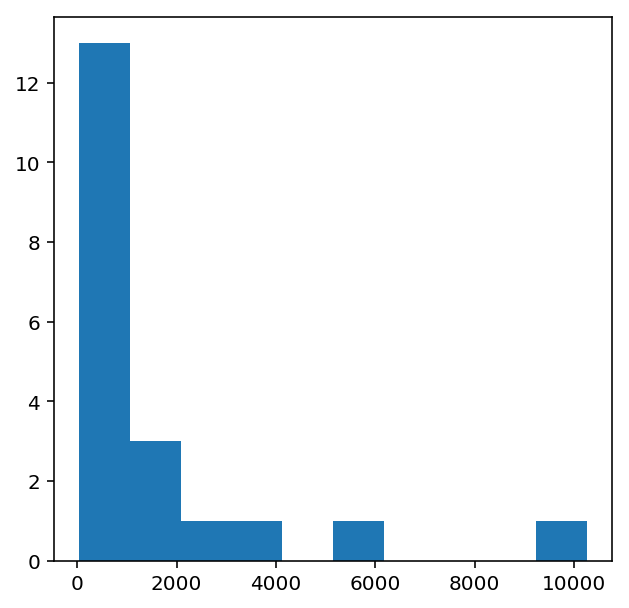

In [6]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [7]:
frequent_notes = [note_ for note_, count in freq.items() if count>=2]
print(len(frequent_notes))

20


In [8]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

new_music

array([list(['48', '48', '50', '48', '48', '48', '48', '45', '45', '47', '45', '47', '45', '43', '43', '43', '43', '43', '43', '58', '43', '38', '38', '38', '38', '38', '38', '47', '38', '48', '38', '47', '38', '38', '40', '38', '38', '47', '38', '43']),
       list(['42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '42', '38', '42', '42', '36', '42', '42', '48', '48', '38', '38', '42', '42', '36', '42', '38', '42', '42', '42', '42', '42', '42', '48', '38', '38', '42', '36', '42', '42', '42', '42', '42', '42', '40', '38', '42', '42', '42', '42', '42', '48', '48', '40', '38', '43', '42', '42', '42', '42', '42', '42', '36', '42', '42', '38', '38', '42', '42', '36', '42', '42', '42', '48', '48', '36', '40', '38', '42', '42', '42', '42', '42', '42', '48', '40', '38', '42', '38', '45', '45', '42', '42', '43', '43', '43', '38', '40', '40', '43', '42', '42', '42', '42', '42', '42', '48', 

In [9]:

no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)
print (x.shape, y.shape)
y

(22341, 32) (22341,)


array(['38', '38', '40', ..., '43', '43', '43'], dtype='<U2')

In [10]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
x_note_to_int

{'58': 0,
 '44': 1,
 '49': 2,
 '47': 3,
 '42': 4,
 '36': 5,
 '50': 6,
 '53': 7,
 '52': 8,
 '45': 9,
 '46': 10,
 '55': 11,
 '37': 12,
 '57': 13,
 '59': 14,
 '48': 15,
 '38': 16,
 '43': 17,
 '51': 18,
 '40': 19}

In [11]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)
x_seq

array([[15, 15,  6, ..., 15, 16,  3],
       [15,  6, 15, ..., 16,  3, 16],
       [ 6, 15, 15, ...,  3, 16, 16],
       ...,
       [18, 18, 18, ..., 16, 16, 16],
       [18, 18, 18, ..., 16, 16, 17],
       [18, 18, 18, ..., 16, 17, 17]])

In [12]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])
y_seq

array([15, 15, 19, ..., 17, 17, 17])

In [13]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [14]:
x_tr

array([[ 5,  5,  4, ..., 19,  4, 16],
       [ 4, 19, 16, ..., 16,  4,  4],
       [15,  1, 19, ..., 19, 19,  1],
       ...,
       [16, 16, 16, ...,  5,  5, 16],
       [16,  2, 16, ..., 18, 16, 18],
       [18,  5,  1, ..., 18, 16, 18]])

In [15]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 100)           2000      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 64)            19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 128)           0         
______________________________________

In [16]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [22]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Train on 17872 samples, validate on 4469 samples
Epoch 1/50
17872/17872 [==============================] - 3s 178us/step - loss: 1.3772 - val_loss: 1.5681

Epoch 00001: val_loss did not improve from 1.50881
Epoch 2/50
17872/17872 [==============================] - 3s 161us/step - loss: 1.3547 - val_loss: 1.5211

Epoch 00002: val_loss did not improve from 1.50881
Epoch 3/50
17872/17872 [==============================] - 3s 162us/step - loss: 1.3522 - val_loss: 1.4981

Epoch 00003: val_loss improved from 1.50881 to 1.49815, saving model to best_model.h5
Epoch 4/50
17872/17872 [==============================] - 3s 163us/step - loss: 1.3370 - val_loss: 1.5063

Epoch 00004: val_loss did not improve from 1.49815
Epoch 5/50
17872/17872 [==============================] - 3s 166us/step - loss: 1.3279 - val_loss: 1.5111

Epoch 00005: val_loss did not improve from 1.49815
Epoch 6/50
17872/17872 [==============================] - 3s 165us/step - loss: 1.3099 - val_loss: 1.4994

Epoch 00006: val_lo

In [23]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [24]:

import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(100):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[16, 18, 18, 18, 18, 18, 18, 12, 17, 12, 18, 16, 18, 16, 18, 18, 18, 12, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


In [25]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]
predicted_notes

['38',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '37',
 '43',
 '37',
 '51',
 '38',
 '51',
 '38',
 '51',
 '51',
 '51',
 '37',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51',
 '51']

In [35]:
import pretty_midi
#https://books.google.no/books?id=SUvODwAAQBAJ&pg=PA175&lpg=PA175&dq=pretty_midi+for+drum+midi+example&source=bl&ots=zROtaiYtB-&sig=ACfU3U1K6G433BUHSWAeuPOJo0rgNazstQ&hl=no&sa=X&ved=2ahUKEwiy89ffkcLoAhUawsQBHd6xCooQ6AEwA3oECAoQAQ#v=onepage&q=pretty_midi%20for%20drum%20midi%20example&f=false

def create_midi(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    drum_program = pretty_midi.instrument_name_to_program('SteelDrums')
    print (drum_program)
    drum = pretty_midi.Instrument(program=0, is_drum=True, name="Midi Drums")
    time = 0
    step = 0.1
    for note_number in notes:
        myNote = pretty_midi.Note(velocity=100, pitch=int(note_number), start=time, end=time+step)
        drum.notes.append(myNote)
        time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(predicted_notes)
print (new_midi_data)
new_midi_data.write('final.mid')

114


In [33]:
from pretty_midi import Instrument
pm = pretty_midi.PrettyMIDI("data/rock1.mid")
pm.instruments = [instrument for instrument in pm.instruments if instrument.is_drum]
print (pm.instruments)
drum = Instrument(program=0, is_drum=True)

[Instrument(program=0, is_drum=True, name="Midi Drums")]
